In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

import os
from glob import glob

In [3]:
import warnings
warnings.simplefilter(action="ignore")

## for raw data

In [4]:
companies = ["AMAZON", "APPLE", "META", "GOOGLE", "NETFLIX"]
frequency = "daily"
path = os.getcwd()

files_raw = glob(f"/diploma_info/datalake/raw_data/*_{frequency}.csv")
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [6]:
meta = pd.read_csv(
    files_raw[2], 
    parse_dates=['Date'],
    date_parser=dateparse,
    index_col=['Date']
)
meta.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000
2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000
2024-02-28,139.100006,139.279999,136.639999,137.429993,137.429993,30628700
2024-02-29,138.350006,139.949997,137.570007,139.779999,139.779999,35485000
2024-03-01,139.610001,140.000000,137.975006,138.080002,138.080002,28522000


<Axes: >

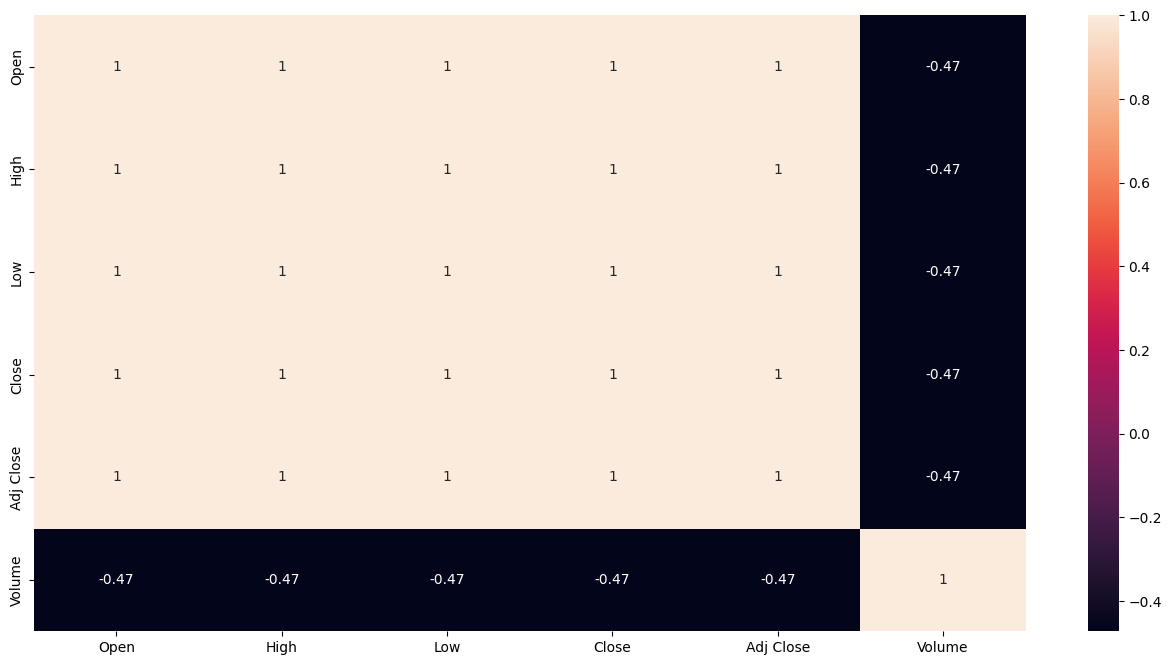

In [7]:
sns.heatmap(meta.corr(), annot=True)

In [8]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4917 entries, 2004-08-19 to 2024-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4917 non-null   float64
 1   High       4917 non-null   float64
 2   Low        4917 non-null   float64
 3   Close      4917 non-null   float64
 4   Adj Close  4917 non-null   float64
 5   Volume     4917 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 268.9 KB


In [9]:
meta.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4.917000e+03
mean,42.689152,43.139984,42.258956,42.707953,42.707953,1.177623e+08
std,39.908168,40.356939,39.507129,39.938435,39.938435,1.506985e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.884954,13.020446,12.777855,12.907868,12.907868,2.814790e+07
50%,26.706179,26.917999,26.493999,26.699499,26.699499,5.936167e+07
75%,58.600498,59.007500,58.000000,58.518501,58.518501,1.456760e+08
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09


## for processed data

In [13]:
companies = ["AMAZON", "APPLE", "META", "GOOGLE", "NETFLIX"]
frequency = "daily"
path = os.getcwd()

files = glob(f"/diploma_info/datalake/processed_data/*_{frequency}.csv")
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [21]:
df = pd.read_csv(
    files[2], 
    parse_dates=['date'],
    date_parser=dateparse,
    index_col=['date']
)
df.tail()

,open,high,low,close,adj close,volume,diff_value,growth,year,month,...,1_UAH_to_EUR_lag_1,close_max_3_days,close_min_3_days,close_mean_3_days,close_max_5_days,close_min_5_days,close_mean_5_days,close_max_7_days,close_min_7_days,close_mean_7_days
date,,,,,,,,,,,,,,,,,,,,,
2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000,-6.539993,0,2024,2,...,0.02411,145.0,144.0,145.0,145.0,142.0,144.0,147.0,142.0,144.0
2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000,1.350006,1,2024,2,...,0.02401,145.0,139.0,143.0,145.0,139.0,143.0,145.0,139.0,143.0
2024-02-28,139.100006,139.279999,136.639999,137.429993,137.429993,30628700,-2.670013,0,2024,2,...,0.02410,145.0,139.0,141.0,145.0,139.0,143.0,145.0,139.0,142.0
2024-02-29,138.350006,139.949997,137.570007,139.779999,139.779999,35485000,2.350006,1,2024,2,...,0.02423,140.0,137.0,139.0,145.0,137.0,141.0,145.0,137.0,142.0
2024-03-01,139.610001,140.000000,137.975006,138.080002,138.080002,28522000,-1.699997,0,2024,3,...,0.02433,140.0,137.0,139.0,145.0,137.0,140.0,145.0,137.0,142.0


In [22]:
df.corr()['growth']

open                  0.003463
high                  0.011265
low                   0.013080
close                 0.021223
adj close             0.021223
volume               -0.073913
diff_value            0.621356
growth                1.000000
year                  0.007388
month                -0.036664
day                  -0.066314
day_of_week          -0.024452
week_of_year         -0.039855
close_lag_1          -0.004644
volume_lag_1         -0.017575
diff_value_lag_1     -0.003172
close_lag_2          -0.004513
volume_lag_2         -0.041942
diff_value_lag_2      0.006146
close_lag_3          -0.004770
volume_lag_3         -0.022042
diff_value_lag_3     -0.050911
close_lag_4          -0.002653
volume_lag_4         -0.001272
diff_value_lag_4     -0.011691
close_lag_5          -0.002167
volume_lag_5         -0.015479
diff_value_lag_5     -0.030057
close_lag_6          -0.000922
volume_lag_6         -0.009237
diff_value_lag_6     -0.008755
close_lag_7          -0.000559
volume_l

<Axes: >

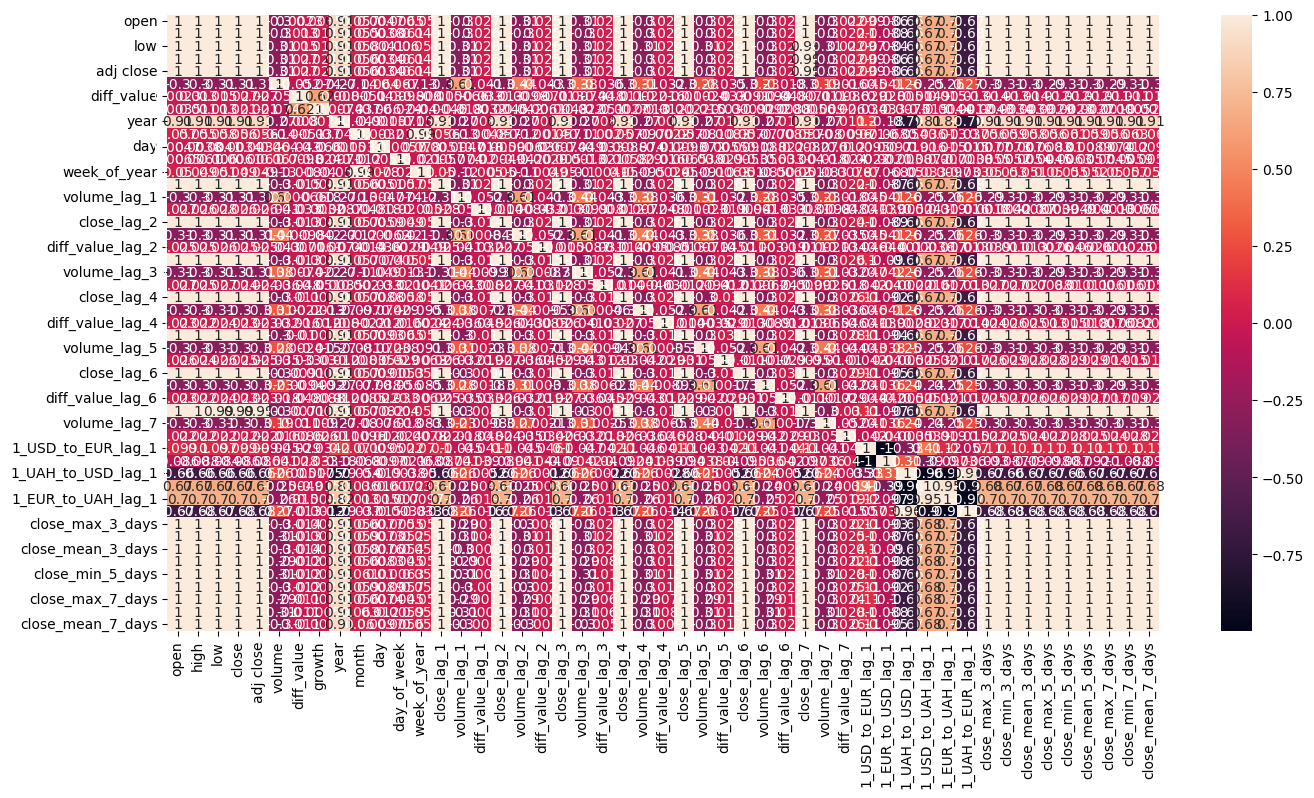

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
df

,open,high,low,close,adj close,volume,diff_value,growth,year,month,...,1_UAH_to_EUR_lag_1,close_max_3_days,close_min_3_days,close_mean_3_days,close_max_5_days,close_min_5_days,close_mean_5_days,close_max_7_days,close_min_7_days,close_mean_7_days
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,-0.079283,0,2015,1,...,0.05225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,-0.545502,0,2015,1,...,0.05243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,-0.593870,0,2015,1,...,0.05305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082,-0.042881,0,2015,1,...,0.05292,26.0,25.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641,0.078783,1,2015,1,...,0.05345,26.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000,-6.539993,0,2024,2,...,0.02411,145.0,144.0,145.0,145.0,142.0,144.0,147.0,142.0,144.0
2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000,1.350006,1,2024,2,...,0.02401,145.0,139.0,143.0,145.0,139.0,143.0,145.0,139.0,143.0
2024-02-28,139.100006,139.279999,136.639999,137.429993,137.429993,30628700,-2.670013,0,2024,2,...,0.02410,145.0,139.0,141.0,145.0,139.0,143.0,145.0,139.0,142.0


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# pd.date_range('2024-02-15', '2024-03-15', freq='B')    # producing date_range for only business days